## 1. (a) Implementing Hard Margin SVM classifiers primal and dual forms from scratch

In [128]:
#references
#https://www.cvxpy.org/examples/machine_learning/ridge_regression.html
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#2.-Bubble-plot-with-Encircling
#(for encircle code)

In [129]:
%matplotlib inline
import cvxpy as cp
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
from scipy.spatial import ConvexHull as ConvexHull

In [130]:
data=datasets.load_iris()

In [131]:
X=np.array(data.data)
y=np.array(data.target)
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [132]:
X=np.delete(X, np.array([1,2]), axis = 1)

In [133]:
X.shape, y.shape

((150, 2), (150,))

In [134]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [135]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [136]:
y_=[]
for i in y:
    if i==0:
        y_.append(1)
    else:
        y_.append(-1)
y=np.array(y_)
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

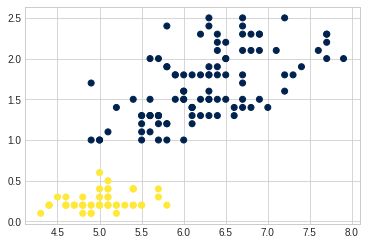

In [137]:
plt.scatter(X[:,0], X[:,1], c=y, cmap ='cividis')

In [138]:
class SVM_hard:
    def objective_fn(self, w):
        return cp.norm(w)**2/2
    def fit(self, X, y):
        w = cp.Variable(2)
        b = cp.Variable()
        self.constraint = [( y[i]*(w.T@X[i] + b) - 1 ) >= 0 for i in range(len(X))]
        problem = cp.Problem(cp.Minimize(self.objective_fn(w)), self.constraint)
        problem.solve()
        print(problem.status)
        self.w = w.value
        self.b = b.value
        self.support_vectors = []
        for x in X:
                tmp = self.w @ x.T + self.b
                if 1-tmp<10**(-8) and 1-tmp>-10**(-8):
                    self.support_vectors.append(x)
                if -1-tmp<10**(-8) and -1-tmp>-10**(-8):
                    self.support_vectors.append(x)    
        self.support_vectors = np.unique(self.support_vectors, axis = 0)
    def predict(self, X):
        y=[]
        for x in X:
            tmp = self.w @ x.T + self.b
            if tmp >=0:
                y.append(1)
            else:
                y.append(-1)
        return np.array(y)
        

In [139]:
svm = SVM_hard()
svm.fit(X,y)

optimal


In [140]:
y_=svm.predict(X)
correct = 150-np.count_nonzero(y_-y)
print("Accuracy : ", correct*100/150)

Accuracy :  100.0


### Dual Values 

In [141]:
dual = [i.dual_value for i in svm.constraint]
print(np.array(dual))

[8.74348766e-11 8.52309823e-11 8.33896574e-11 8.25728155e-11
 8.62804461e-11 1.96133611e-10 1.08710314e-10 8.62804461e-11
 8.10906662e-11 6.85243120e-11 9.17143719e-11 8.42717450e-11
 6.78734298e-11 6.50713946e-11 1.00437415e-10 2.49088320e-10
 1.96133611e-10 1.16626633e-10 1.38798869e-10 1.16626633e-10
 9.17143719e-11 1.75034617e-10 8.25728155e-11 3.44651818e-10
 8.42717450e-11 8.62804461e-11 1.70715031e-10 8.87112843e-11
 8.87112843e-11 8.33896574e-11 8.42717450e-11 1.96133611e-10
 7.07675412e-11 9.34948539e-11 8.52309823e-11 8.62804461e-11
 9.34948539e-11 6.85243120e-11 8.10906662e-11 8.74348766e-11
 1.14602943e-10 1.07619272e-10 8.10906662e-11 1.24999981e+01
 1.75034617e-10 1.11291679e-10 8.74348766e-11 8.25728155e-11
 9.01297321e-11 8.62804461e-11 7.70992356e-11 6.21694899e-11
 6.14689663e-11 1.05723030e-10 6.19880908e-11 1.04538925e-10
 5.23798167e-11 6.98478319e+00 1.03936512e-10 8.25141984e-11
 2.26454539e+00 6.34462917e-11 1.79817560e-01 7.79237827e-11
 1.05066914e-10 7.707989

what do they mean? - They correspond to the support vector points if their values tend to zero else they correspond to other points in the dataset


### Plotting the decision boundary

In [143]:
svm.w, svm.b

(array([-3.08375107e-10, -5.00000000e+00]), array(4.))

In [144]:
svm.support_vectors

array([[4.9, 1. ],
       [5. , 0.6],
       [5. , 1. ],
       [5.5, 1. ],
       [5.7, 1. ],
       [5.8, 1. ],
       [6. , 1. ]])

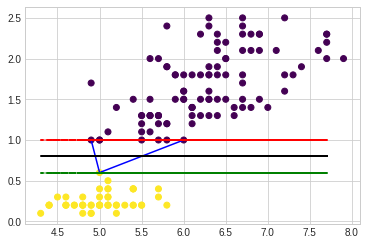

In [163]:
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)


plt.scatter(X[:,0], X[:,1], c=y, cmap ='viridis')
x_plot = np.random.choice(X[:,0], 100)
y_plot = [-1*(svm.w[0]*i + svm.b)/svm.w[1] for i in x_plot]
y_plot1 = [-1*(svm.w[0]*i + svm.b+1)/svm.w[1] for i in x_plot]
y_plot2 = [-1*(svm.w[0]*i + svm.b-1)/svm.w[1] for i in x_plot]
plt.plot(x_plot, y_plot, color = 'black')
plt.plot(x_plot, y_plot1,  color = 'red', ls='--')
plt.plot(x_plot, y_plot2, ls = '--', color = 'green')

    
x_ = [i[0] for i in svm.support_vectors]
y_ = [i[1] for i in svm.support_vectors]
encircle(x_,y_, ec="blue", fc="none", linewidth=1.5)
plt.show()

The support vectors are encircled by the blue polygon

In [146]:
a=np.unique(np.array([1,2,2,5]))


### Using SKlearn's SVM

In [147]:
from  sklearn.svm import SVC as svmC

In [148]:
svm_sk=svmC(kernel='linear')

In [149]:
svm_sk.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [150]:
sv = svm_sk.support_vectors_

In [151]:
n=svm_sk.n_support_
n

array([7, 7], dtype=int32)

In [152]:
sv1 = sv[:n[0]]
sv2 = sv[n[0]:]

In [153]:
sv1

array([[4.9, 1. ],
       [5. , 1. ],
       [6. , 1. ],
       [5.8, 1. ],
       [5.7, 1. ],
       [5.5, 1. ],
       [5. , 1. ]])

In [154]:
sv2

array([[5.4, 0.4],
       [5.7, 0.4],
       [5.4, 0.4],
       [5.1, 0.5],
       [5.4, 0.4],
       [5. , 0.6],
       [5.1, 0.4]])

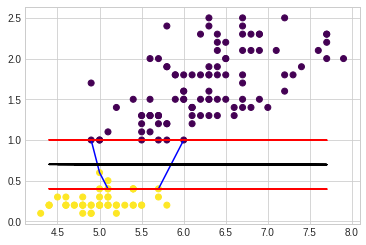

In [155]:
w = svm_sk.coef_[0]
b = svm_sk.intercept_[0]


plt.scatter(X[:,0], X[:,1], c=y, cmap ='viridis')
x_plot = np.random.choice(X[:,0], 100)
y_plot = [-1*(w[0]*i + b)/w[1] for i in x_plot]
y_plot1 = [-1*(w[0]*i + b+1)/w[1] for i in x_plot]
y_plot2 = [-1*(w[0]*i + b-1)/w[1] for i in x_plot]
plt.plot(x_plot, y_plot, color = 'black')
plt.plot(x_plot, y_plot1,  color = 'red', ls='--')
plt.plot(x_plot, y_plot2, ls = '--', color = 'red')


    
x_ = [i[0] for i in sv]
y_ = [i[1] for i in sv]
encircle(x_,y_, ec="blue", fc="none", linewidth=1.5)
plt.show()

In [156]:

X_new.shape, y_new.shape

((7, 2), (7,))

### Decision Boundary while training with only support vectors

In [157]:
X_new = svm.support_vectors
y_new = svm.predict(X_new)

In [158]:
svm_new = SVM_hard()
svm_new.fit(X_new, y_new)


optimal


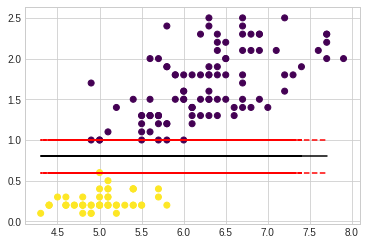

In [159]:

plt.scatter(X[:,0], X[:,1], c=y, cmap ='viridis')
x_plot = np.random.choice(X[:,0], 100)
y_plot = [-1*(svm_new.w[0]*i + svm_new.b)/svm_new.w[1] for i in x_plot]
y_plot1 = [-1*(svm_new.w[0]*i + svm_new.b+1)/svm_new.w[1] for i in x_plot]
y_plot2 = [-1*(svm_new.w[0]*i + svm_new.b-1)/svm_new.w[1] for i in x_plot]
plt.plot(x_plot, y_plot, color = 'black')
plt.plot(x_plot, y_plot1,  color = 'red', ls='--')
plt.plot(x_plot, y_plot2, ls = '--', color = 'red')


plt.show()

The decision boundary comes out to be exactly same even after throwing all the points except the support vextors. This is because the suppport vectors are the points which decide the seperating boundary.